# Exercise 7

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

C:\Users\Edgardo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [3]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [4]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [6]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
y_train[0]

array([6])

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

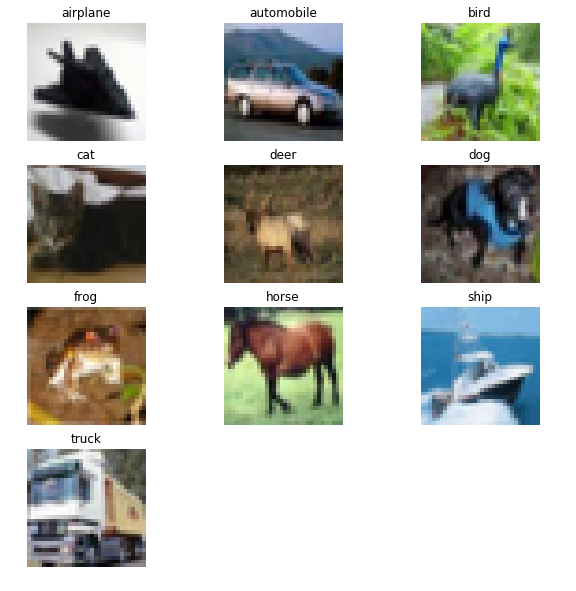

In [10]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 07.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras
from keras.optimizers import rmsprop

### According of defined parameters, we modeling a neural net with rmsprop optimizer, loss categorical_crossentropy function and Softmax Activation:

In [30]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.compile(loss = 'binary_crossentropy',optimizer = rmsprop(lr=0.0001, decay=0.0),metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


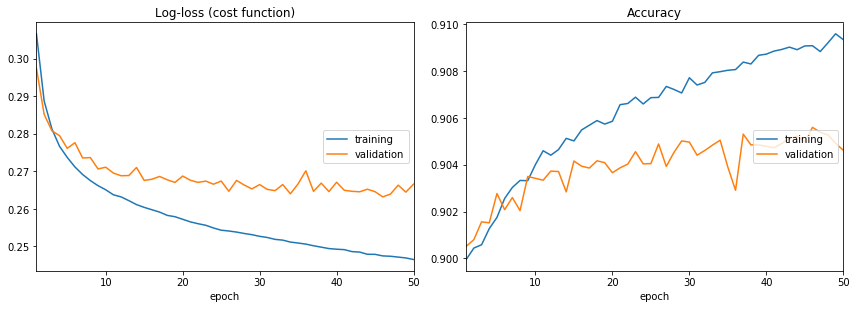

In [31]:
model.fit(X_train, Y_train, validation_data=[X_test, Y_test], epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

In [32]:
print(model.predict(X_test))

[[0.06011775 0.10576358 0.12659805 ... 0.00443314 0.08409134 0.0013284 ]
 [0.05552235 0.14870225 0.00812742 ... 0.00172959 0.15129729 0.6241107 ]
 [0.26793182 0.07786805 0.02064743 ... 0.00702292 0.5040508  0.08741467]
 ...
 [0.04987651 0.00769126 0.10793564 ... 0.10155518 0.02906673 0.01388895]
 [0.03047104 0.06658457 0.17137009 ... 0.05049303 0.03570585 0.0402313 ]
 [0.08113149 0.02025317 0.1309474  ... 0.41159624 0.05565564 0.03019464]]


In [33]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 53us/step
Test score: 0.2665799364089966
Test accuracy: 0.9046200319290161


After running the models with the defined parameters, adjustment was made in both the amount of epochs and the learning rate, that went from 0.01 to 0.001 and finally fixed in 0.001, observing in 50 iterations, an appropriate behavior in the learning the network. Finalmente se obtuvo un accuracy in test de 0,90. 

# Exercise 07.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

# According to the defined parameters, the neural network is defined.

In [37]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same', 
          input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D (2,2))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss = 'categorical_crossentropy',optimizer = rmsprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),metrics = ['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                81930     
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total para

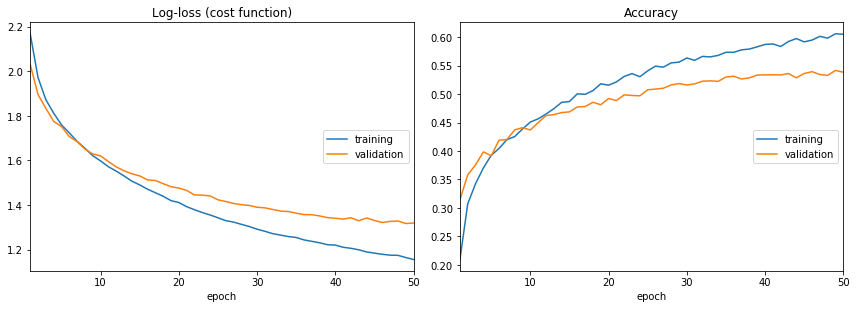

In [38]:
model1.fit(X_train, Y_train, validation_data=[X_test, Y_test], epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

In [39]:
print(model1.predict(X_test))

[[1.56952552e-02 2.97597586e-03 6.58702254e-02 ... 5.55487000e-04
  1.83002260e-02 7.67276331e-04]
 [1.65438816e-01 4.13862795e-01 1.88747304e-04 ... 1.23311211e-05
  3.04403484e-01 1.15963750e-01]
 [4.01637763e-01 1.21361449e-01 1.51840253e-02 ... 1.49844948e-03
  3.88214409e-01 5.99872395e-02]
 ...
 [5.59277367e-04 2.38738125e-04 1.17776595e-01 ... 1.36515394e-01
  1.00072531e-03 1.83618348e-03]
 [1.72255673e-02 2.03196585e-01 1.92134306e-02 ... 5.97065948e-02
  2.46561272e-03 5.68610467e-02]
 [6.23306213e-03 3.60704819e-03 3.31715047e-02 ... 5.38151801e-01
  6.78973785e-03 1.78952310e-02]]


In [40]:
score = model1.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 861us/step
Test score: 1.3192782939910888
Test accuracy: 0.5383


We experimented with different learning rate and number of iterations, but only at the 0.0001 rate was it possible to obtain the suggested (0,53) accuraccy for 50 epochs.

# Exercise 07.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [20]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

# The VVG16 model is defined according to the parameters

In [42]:
model_vgg16 = Sequential()
model_vgg16.add(Flatten(input_shape=(32,32,3)))
model_vgg16.add(Dense(512, activation='softmax'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(10, activation='softmax'))
model_vgg16.compile(loss='categorical_crossentropy', optimizer=rmsprop(lr=0.0001), metrics=['accuracy'])
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


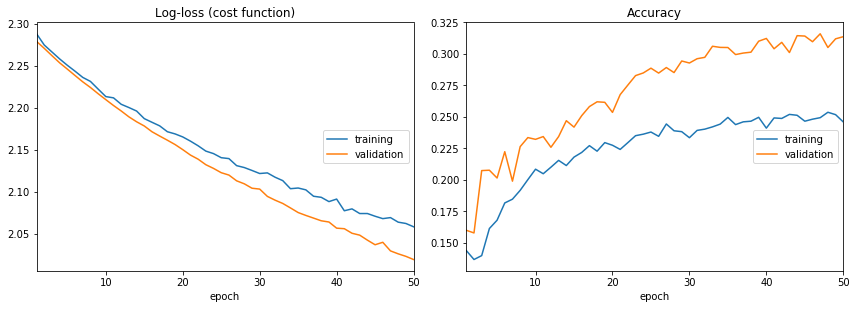

In [43]:
model_vgg16.fit(X_train, Y_train, validation_data=[X_test, Y_test], epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

In [44]:
print(model_vgg16.predict(X_test))

[[0.06316543 0.07498248 0.11898436 ... 0.08907255 0.06676315 0.06080092]
 [0.17233774 0.1207422  0.08247396 ... 0.06936772 0.18698615 0.14798981]
 [0.18393424 0.1099327  0.08193192 ... 0.06743982 0.19717695 0.14941452]
 ...
 [0.0614119  0.06327888 0.09461983 ... 0.07913398 0.0877161  0.05638764]
 [0.05345087 0.0539729  0.14452149 ... 0.0890382  0.04600503 0.047641  ]
 [0.07652301 0.05774835 0.12033729 ... 0.19818115 0.05096366 0.08909395]]


In [45]:
score = model_vgg16.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s 320us/step
Test score: 2.0190896537780763
Test accuracy: 0.3134



### Although different levels in the learning rate were calibrated, performance of the model was not achieved according to the suggested accuracy (0.57). The final model preserves the learning rate of 0.0001 with 50 iterations.

# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 

In [48]:
from keras.applications.resnet50 import ResNet50
model_RESNET50 = ResNet50(weights='imagenet', include_top=False)

94658560/94653016 [==============================] - 56s 1us/step


# The RESNET50 model is defined according to the same parameters in above VGG16

In [49]:
model_resnet50 = Sequential()
model_resnet50.add(Flatten(input_shape=(32,32,3)))
model_resnet50.add(Dense(512, activation='softmax'))
model_resnet50.add(Dropout(0.5))
model_resnet50.add(Dense(10, activation='softmax'))
model_resnet50.compile(loss='categorical_crossentropy', optimizer=rmsprop(lr=0.0001), metrics=['accuracy'])
model_resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


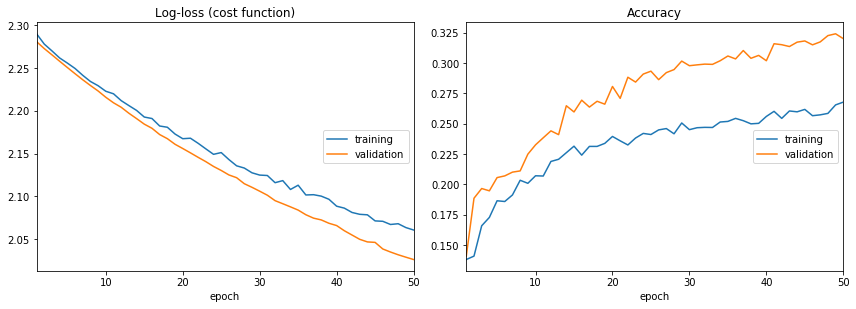

In [50]:
model_resnet50.fit(X_train, Y_train, validation_data=[X_test, Y_test], epochs=50, verbose=2, callbacks=[PlotLossesKeras()])

In [51]:
score = model_vgg16.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 5s 489us/step
Test score: 2.0190896537780763
Test accuracy: 0.3134



Although according to the references, there is empirical evidence that shows residual networks are easier to optimize and can obtain precision from a considerably greater depth, the results with RESNET50 were similar to those obtained with VGG16, which makes us think that the architecture of the neural network should be modified. RESNET50 is based on a type of residual learning to facilitate network training, with layers as residual learning functions with reference to layer inputs, instead of learning functions without reference.